In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)


In [3]:
X , y_true

(array([[ -9.1139443 ,   6.81361629],
        [ -9.35457578,   7.09278959],
        [ -2.01567068,   8.28177994],
        [ -7.01023591,  -6.22084348],
        [-10.06120248,   6.71867113],
        [ -6.36503142,  -6.97607271],
        [  4.74378739,   2.20436011],
        [ -6.63186832,  -7.21834432],
        [ -2.79670217,   8.90289074],
        [  3.92509674,   2.36710185],
        [ -2.87022159,  10.12565304],
        [  4.85408813,   1.55742393],
        [ -2.38387947,   7.83848405],
        [ -3.35842007,   8.76189893],
        [ -9.2287133 ,   7.03124769],
        [ -2.93042948,   8.81768884],
        [ -9.81485322,   7.35237388],
        [  3.42479328,   2.08504227],
        [ -2.45095109,   9.59547312],
        [ -2.15708337,  10.3285595 ],
        [  5.33503618,   1.48076029],
        [ -2.60596905,   9.25671664],
        [ -6.29455535,  -6.96834402],
        [ -8.90572459,   7.19094116],
        [ -2.78724824,   8.73484828],
        [ -8.52044525,   8.18846409],
        [ -9

In [4]:
# Step 2: Apply KMeans with K=4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [5]:
# Step 3: Calculate silhouette score
sil_score = silhouette_score(X, y_kmeans)


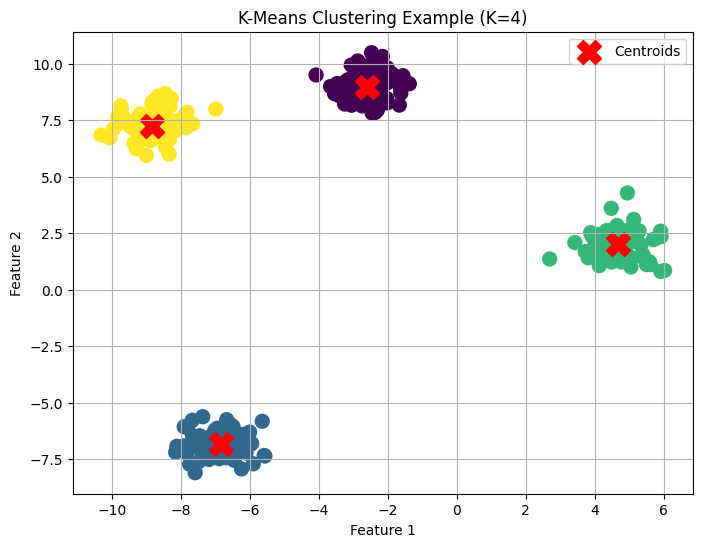

np.float64(0.8756469540734731)

In [6]:
# Step 4: Plot clusters and centroids
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=100, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering Example (K=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

sil_score

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [10]:
X,y = make_blobs(n_samples=1000 , centers=3 , n_features=2 , random_state=42)

In [13]:
X.shape


(1000, 2)

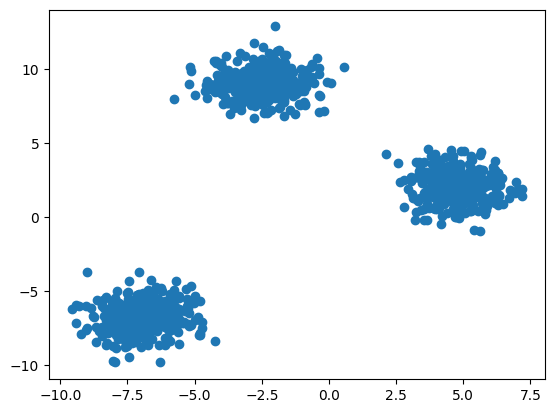

In [14]:
plt.scatter(X[:,0],X[:,1])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train , x_test , y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=42 )

In [19]:
#manual process
#elbow method

wcss = []

for k in range (1, 11):
    kmeans = KMeans(n_clusters=k , init="k-means++")
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)


In [20]:
wcss

[52946.11684919716,
 15369.674523316207,
 1599.7085950090782,
 1429.7550212507606,
 1219.861280376302,
 1123.7989389996687,
 940.0990826284872,
 956.6767988648744,
 773.9257844893116,
 669.7014674508385]

Text(0, 0.5, 'WCSS')

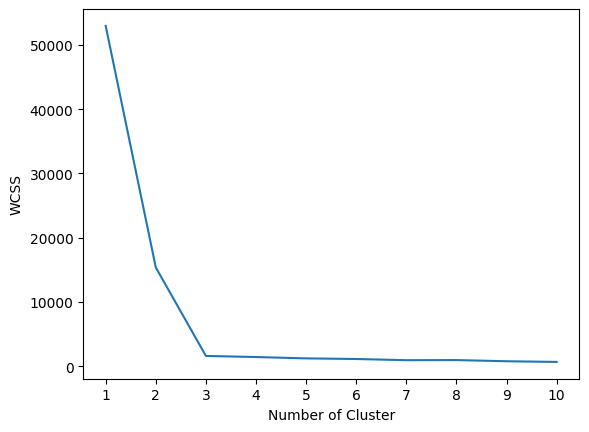

In [21]:
#plot elbow curve
plt.plot(range(1, 11) , wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")


In [22]:
kmeans = KMeans(n_clusters=3 , init="k-means++")
kmeans.fit_predict(x_test)


array([2, 0, 0, 1, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2,
       2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1,
       2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 0, 0, 1, 1,
       0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1,
       2, 2, 0, 0, 1, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1,
       2, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 2], dtype=int32)

In [30]:
from kneed import KneeLocator

In [32]:
k = KneeLocator(range(1,11) , wcss , curve="convex" , direction="decreasing")
k.elbow


np.int64(3)